# Bruk av Euler-Cromer-metoden og bli kjent med SciPy-biblioteket

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 2

**Forkunnskaper:** Introduksjon til SciPy-notebooken og Euler-metoden. 

**Læringsmål:** Løse andreordens ODE ved bruk av Euler-Cromer-metoden. Bli kjent med SciPy-bibliotekets og dens IVP-løser.

------------------------

I programmeringsøving 1 ble Euler-metoden brukt til å finne en løsning av bevegelsesligningen for en enkel harmonisk pendel. Vi observerte da at vinkelutslaget, og derfor energien, økte med tiden. Det kan derfor være ønskelig å benytte en annen ODE-løser for å få en bedre løsning, uten å måtte bruke en veldig liten steglengde.

Til dette skal vi benytte Euler-Cromer metoden (ofte også kalt semi-implisitt Euler-metode). Metoden er basert på en enkel modifikasjon av Euler metoden. Vi bruker de *gamle* verdiene, $\theta_i$ for å beregne vinkelhastigheten $\omega_{i+1}$, men den *oppdaterte* verdien, $\omega_{i+1}$, for å beregne vinkelen, $\theta_{i+1}$.

Bevegelsesligningen (som ble utledet i programmeringsøving 1) er


$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$ 

hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.

## Oppgave 1 – Løsning av bevegelsesligningen ved Euler-Cromer metoden 

Parametrene og initialbetingelsene til pendelen

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\dot{\theta}_0 = 0.0$ rad/s

**a)** Lag en funksjon hvor du beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, ved å bruke Euler-Cromer metoden. Anta også her at $\sin \theta \approx \theta$ (lite vinkelutslag).

In [1]:
# Husk å importere nødvendige biblioteker
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definer konstanter og initialbetingelser
l = 1.0
m = 5.0
g = 9.81
theta_0 = 0.2
theta_dot_0 = 0.0

# For å plotte i notebooken
# %matplotlib inline

def euler_cromer_approx(theta_0, theta_dot_0, dt, T):
    
    """
    Calculates angular displacement and angular velocity using the Euler-Cromer method
    
    PARAMETERS:
    -----------
    theta_0: initial angular displacement 
    theta_dot_0: initial angular velocity
    dt: timestep
    T: max t
    
    
    RETURNS:
    --------
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    
    # SKRIV KODE HER
    N = int(T/dt)
    t = np.linspace(0, T, N)
    theta = np.zeros(N + 1)
    w = np.zeros(N + 1)

    theta[0], w[0] = theta_0, theta_dot_0

    for i in range(N):
        w[i + 1] = w[i] + dt * -g/l*theta[i]
        theta[i + 1] = theta[i] + dt * w[i + 1]

    return theta[:-1], w[:-1], t

def energy_calculation(theta, w):
    """
    Calculates total energy for each time which theta and omega is calculated for. 
    Assumes that the shapes of theta and w are compatible.
    
    theta: array of theta-values for the angular displacement
    w: array of w-values for the angular velocity
    """
    
    # SKRIV KODE HER
    """
    E_total: array with the total energy found from values of theta and w (omega)
    """
    
    E_total = 0.5*m*l**2*w**2 + 0.5*m*g*l*(theta**2)
    
    return E_total 

**b)** Vi skal nå undersøke hvor stabil Euler-Cromer metoden er for vårt system.

1. Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, opp til sluttiden $T = 10$ s. Bruk tidssteg $\Delta t = 0.007$ s. Observer at amplituden til vinkelutslaget *ikke* endrer seg med tid slik den gjorde med Euler-metoden i programmeringsøvingøving 1 (oppgave 2c). Euler-Cromer metoden er derfor en forbedring over Euler metoden da vi har konstant total energi.

2. Benytt funksjonen `energy_calculation` fra programmeringsøving 1 (oppgave 2b) til å regne ut energien fra Euler-Cromer metoden. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$ s, $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Husk å inkludere `label` for plottene, og `legend` for figuren. Du vil nå observere at den totale energien varierer periodisk, men er bevart over en *periode*,
$2 \pi \sqrt{l/g}$. Videre vil du observere at hvor mye energien varierer over en periode minker med tidssteget. 

5. Beregn energidifferansen mellom slutten og starten av en periode for $\Delta t = 0.001$ s. *Hint:* Plot for tid opp til $t = 2 \pi \sqrt{l/g}$, slik at det siste elementet i arrayen er ved fullført periode. Du kan aksessere siste element i en array, `a`, med `a[-1]`.

Energy difference is 1.0257422167536667e-05 with dt = 0.001
Energy difference is 0.00023300636146439402 with dt = 0.004
Energy difference is 0.0007425532667584278 with dt = 0.007


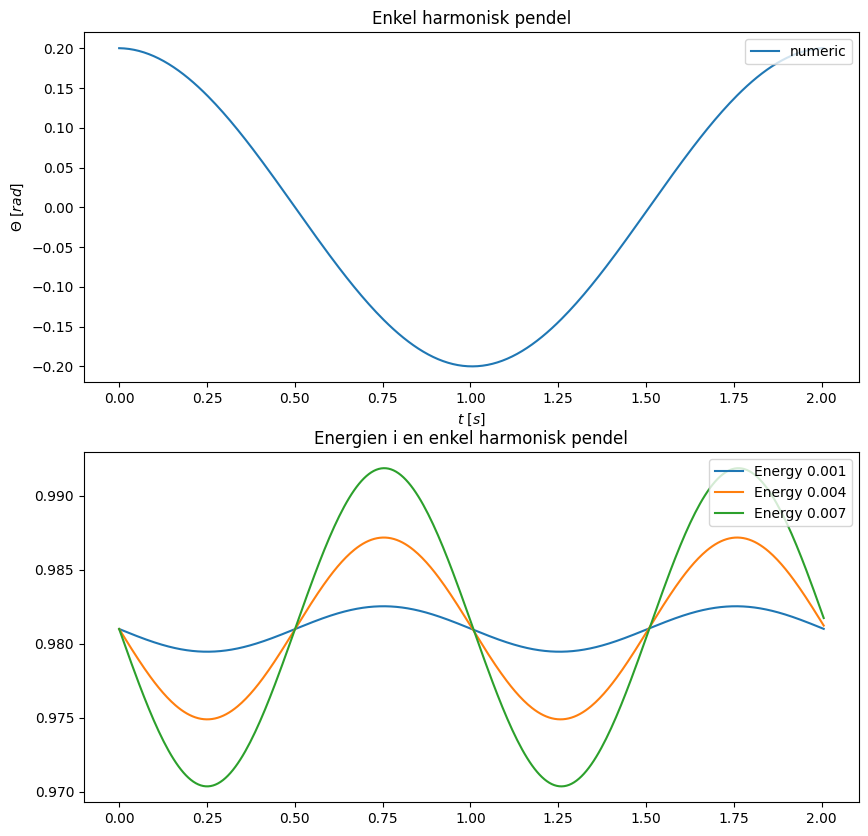

In [2]:
# SKRIV KODE HER
T = 2 * np.pi * np.sqrt(l/g)
dt = 0.007
data = euler_cromer_approx(theta_0, theta_dot_0, dt, T)

f = lambda t, A: A*np.cos(np.sqrt(g/l)*t)
theta, w, t = data
theta_exact = np.array([f(i, theta_0) for i in t])

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

for dt in [0.001, 0.004, 0.007]:
    data = euler_cromer_approx(theta_0, theta_dot_0, dt, T)
    theta, w, t = data
    Energy = energy_calculation(theta, w)
    axs[1].plot(t, Energy, label=f'Energy {dt}', linewidth=1.5)
    print(f'Energy difference is {Energy[-1] - Energy[0]} with dt = {dt}')
    
# axs[0].plot(t, theta_exact, 'r', label='analytical', linewidth=3)
axs[0].plot(t, theta, label='numeric',linewidth=1.5)

axs[0].set_title('Enkel harmonisk pendel')
axs[1].set_title('Energien i en enkel harmonisk pendel')
axs[0].set_ylabel('$\Theta \ [rad]$')
axs[0].set_xlabel('$t \ [s]$')

axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
plt.show()

**c)** Vi går nå bort fra tilnærmelsen $\sin \theta = \theta$, slik at bevegelsesligningen for pendelen er gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta.
\end{equation}

Denne differensialligningen, som er ikke-lineær, kan ikke løses analytisk, og vi *må* derfor benytte numeriske metoder. Det er svært vanlig at ligninger som beskriver fysiske systemer ikke har analytiske løsninger, og det er derfor nyttig å kunne numeriske metoder for å tilnærme løsningene. 

1. Skriv en funksjon som beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, som funksjon av tid ved bruk av Euler-Cromer metoden for ligningen over. *Hint:* Kun en liten endring av koden er nødvendig.


2. Plot vinkelutslaget funnet med småvinkeltilnærmelsen ($\sin\theta\approx\theta$) sammen med vinkelutslaget som beregnet fra funksjonen over, for initialvinkel $\theta_0 = 15^\circ$ og $\theta_0 = 40^\circ$. Benytt tidssteg $\Delta t = 0.001$ s. Prøv deg gjerne fram med forskjellige vinkler, og observer for hvilke startvinkler det ser ut som at småvinkeltilnærmelsen er rimelig å benytte. *Tips:* Bruk funksjonen `np.radians` for å konvertere fra grader til radianer.
 
 

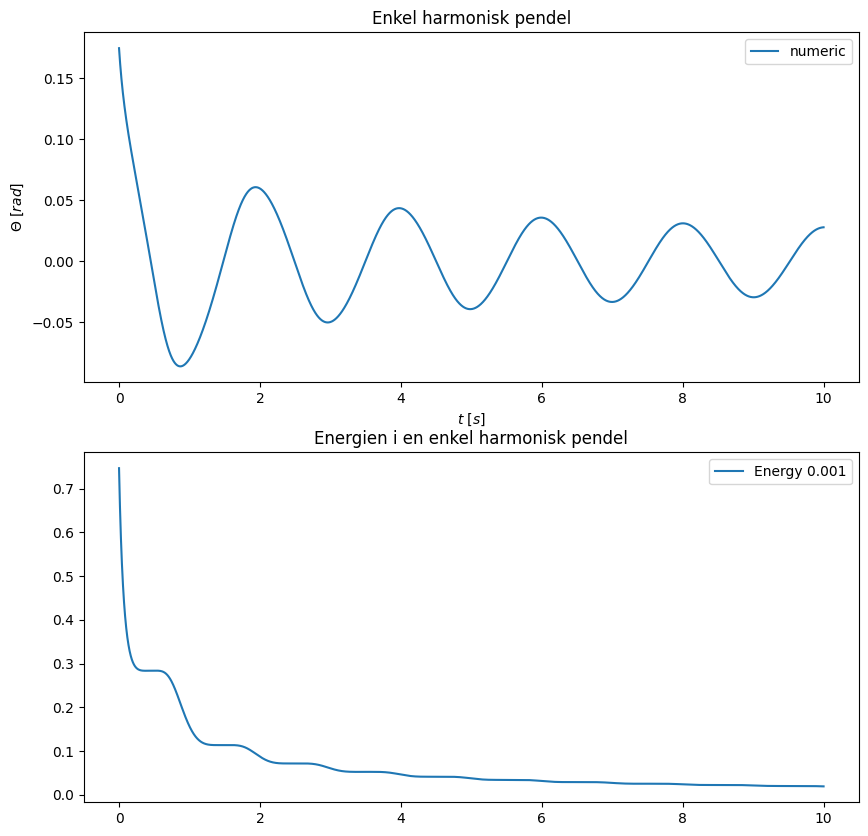

In [7]:
# SKRIV KODE HER

def euler_cromer_approx(theta_0, theta_dot_0, dt, T):
    
    """
    Calculates angular displacement and angular velocity using the Euler-Cromer method
    
    PARAMETERS:
    -----------
    theta_0: initial angular displacement 
    theta_dot_0: initial angular velocity
    dt: timestep
    T: max t
    
    
    RETURNS:
    --------
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    
    # SKRIV KODE HER
    N = int(T/dt)
    t = np.linspace(0, T, N)
    theta = np.zeros(N + 1)
    w = np.zeros(N + 1)

    theta[0], w[0] = theta_0, theta_dot_0

    for i in range(N):
        w[i + 1] = w[i] + dt * -g/l*np.sin(theta[i])
        theta[i + 1] = theta[i] + dt * w[i + 1]

    return theta[:-1], w[:-1], t



# SKRIV KODE HER
theta_0 = np.radians(10)
theta_dot_0 = 0.0

T = 10
dt = 0.001
data = euler_cromer_approx(theta_0, theta_dot_0, dt, T)

f = lambda t, A: A*np.cos(np.sqrt(g/l)*t)
theta, w, t = data
theta_exact = np.array([f(i, theta_0) for i in t])

fig, axs = plt.subplots(2, 1, figsize=(10, 10))


Energy = energy_calculation(theta, w)
axs[1].plot(t, Energy, label=f'Energy {dt}', linewidth=1.5)
    # print(f'Energy difference is {Energy[-1] - Energy[0]} with dt = {dt}')
    
# axs[0].plot(t, theta_exact, 'r', label='analytical', linewidth=3)
axs[0].plot(t, theta, label='numeric',linewidth=1.5)

axs[0].set_title('Enkel harmonisk pendel')
axs[1].set_title('Energien i en enkel harmonisk pendel')
axs[0].set_ylabel('$\Theta \ [rad]$')
axs[0].set_xlabel('$t \ [s]$')

axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
plt.show()



##  Oppgave 2 – Bruk av SciPy biblioteket

Vi skal nå bruke funksjonen `scipy.integrate.solve_ivp` fra SciPy-biblioteket for å finne løsning til bevegelsesligningen for pendelen (som er en andreordens ordinær differensialligning). Når man skal bruke en ny funksjon for første gang så bør man lese gjennom funksjons-dokumentasjonen, for å lære seg hvordan funksjonen brukes. Les derfor gjennom notebooken "Introduksjon til SciPy" som ligger på BlackBoard under "Numeriske øvinger". **Det er viktig at du har lest nøye gjennom denne, og forstår eksempelet gitt der.**

`scipy.integrate.solve_ivp` bruker Runge-Kutta 5(4)-metoden (ofte forkortet RK45) som standard, noe vi også skal bruke i denne oppgaven. Denne metoden er en såkalt *adaptiv metode* med varierende tidssteg. Kort fortalt bruker metoden to ulike ODE-løsere (4. og 5. ordens Runge-Kutta, som vi vil komme tilbake til i numerisk øving 3) til å estimere feilen i hvert steg. Steglengden justeres deretter slik at usikkerheten blir mindre enn en gitt toleranse. Dermed bruker man korte steglengder kun når det er nødvendig. Dere lærer mer om dette i faget TMA4320 Introduksjon til vitenskapelige beregninger. De som er interesserte kan ta en titt på notebooken [Adaptive Runge-Kutta Method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/adaptive_runge_kutta_methods.ipynb) for å lære mer om prinsippet.

I eksemplene fra dokumentasjonen er det vist hvordan man finner løsning for en førsteordens ordinær differensialligning (ODE). Bevegelsesligningen for den enkle harmoniske pendelbevegelsen er en *andreordens ODE*. I numerisk øving 1 viste dere hvordan en andreordens ODE kunne formuleres som *to* førsteordens ODE'er
\begin{align}
    \frac{\text{d}\theta}{\text{d}t}&=f_1(t, \theta, \omega)\\
    \frac{\text{d}\omega}{\text{d}t}&=f_2(t, \theta, \omega).
\end{align}
I likhet med et vilkårlig sett av førsteordens differensialligninger kan dette generelt skrives kompakt på vektorform
\begin{equation}
    \frac{\text{d}\boldsymbol{x}}{\text{d}t}=\boldsymbol{f}(t,\boldsymbol{x}),
\end{equation}
hvor i vårt tilfelle $\boldsymbol{x}=(\theta,\omega)$ og $\boldsymbol{f}=(f_1,f_2)$. `solve_ivp` bruker nettopp denne formuleringen, slik at både funksjonen $f$ og variabelen $y$ vil være en vektor når vi ønsker å løse for et sett med førsteordens ODE'er.

**a)** Lag en funksjon som tar inn en float `t`, og et array `x`, og returnerer et array av de to verdiene til høyresiden av de to ODE-ene for den harmoniske pendelen (uten å anta lite vinkelutslag). Det er gitt funksjonsdeklarasjon, input parametre og hva som skal returneres i funksjonen under. *Hint:* Skriv først bevegelsesligningen for pendelen som to førsteordens ODE-er (slik som ble gjort i programmeringsøving 1). 

(Det kan være verdt å merke seg til senere at det er mulig å gi solve_ivp flere variabler enn de som diff.ligningen løser for ved å bruke `args`-parameteren)


In [4]:
def equation(t, x):
    """
    Calculates the value of RHS of the differentail equations given an array (x) which 
    contains the values of the parameters

    Parameters
    -----------
    t: float. time
    x: array. values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    
    # SKRIV KODE HER
    
    return [dtheta, dw]

"""
Note:
scipy.integrate.solve_ivp requires that fun returns
an object which is of type array_like. 
An ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)
so we can return a list, and do not have to first convert into an np.array. 
"""

'\nNote:\nscipy.integrate.solve_ivp requires that fun returns\nan object which is of type array_like. \nAn ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)\nso we can return a list, and do not have to first convert into an np.array. \n'

**b)** Lag en funksjon som benytter `scipy.integrate.solve_ivp` for å beregne vinkelutslaget, $\theta$ og vinkelhastigheten, $\omega$. Funksjonen skal også returnere en array med tidsverdier. Plot vinkelutslaget som funksjon av tid, opp til $T = 10$ s. Sett $\theta_0 = 0.2$ rad, og $\dot{\theta}_0 = 0.0$ rad/s.

In [5]:
def RK45_method(RHS, theta_0, w_0, T, dt):
    """
    Calculates theta and omega using the scipy.integrate.solve_ivp function (RK54)
    
    RHS: right hand side of differential equations
    T: time-value to calculate up to (e.g. 10 seconds)
    dt: timestep
    
    Returns
    -------
    theta: array of theta values
    w: array of omega values
    t: timevalues
    """
    
    # SKRIV KODE HER
    
    return theta, w, t

# PLOT VINKELUTSLAGET